<a href="https://colab.research.google.com/github/MadisonCostanza/Insurance-Portfolio-Risk-Analysis/blob/main/Primary_Got_Your_Back_Insurance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the best viewing experience I recommend opening this file in Google Colab, as some graphs will not be viewable directly in GitHub.

Please enjoy the analysis!

**Step 1:  Exploratory Data Analysis (EDA)**

We should first import the data libraries we will need:

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import random

We can import our dataset for the analysis and save it as "data:"




In [ ]:
data = pd.read_csv('Analytical_Assessment_Data.csv')

We can make sure the columns are relevant. There are 49,268 rows and 14 columns:

In [ ]:
data.head(5)

,LocationID,Portfolio,State,County,PostalCode,Building Value,Other Value,Contents Value,Time Element Value,Occupancy Code,Construction Code,Stories,Year Built,AAL
0,1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312
1,2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944
2,3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,5+,2002.0,11014.10496
3,4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112
4,5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000


In [ ]:
data.shape

(49268, 14)

Check for duplicated rows:

In [ ]:
data.duplicated().sum()

0

Exploring the data types shows dataset is stored as a DataFrame and there are a combination of integer, object, and float datatypes within the DataFrame.

In [ ]:
type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49268 entries, 0 to 49267
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LocationID          49268 non-null  int64  
 1   Portfolio           49268 non-null  int64  
 2   State               49268 non-null  object 
 3   County              49268 non-null  object 
 4   PostalCode          49268 non-null  int64  
 5   Building Value      49268 non-null  int64  
 6   Other Value         49268 non-null  int64  
 7   Contents Value      49268 non-null  int64  
 8   Time Element Value  49268 non-null  int64  
 9   Occupancy Code      49268 non-null  object 
 10  Construction Code   49268 non-null  object 
 11  Stories             49266 non-null  object 
 12  Year Built          49267 non-null  float64
 13  AAL                 49268 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 5.3+ MB


To make the data easier to work with, we can change all columns names to lowercase and hypenate column names with 2+ words:

In [ ]:
data.columns = data.columns.str.lower().str.replace(" ","_")

We can use functions .value_counts and .describe to validate that values in each variable contain values that we would expect:

In [ ]:
data.portfolio.value_counts()

2    24784
1    24484
Name: portfolio, dtype: int64

We observe there are 10 states in the dataset:

In [ ]:
data.state.value_counts()

TX    9224
PA    7596
NY    7583
IL    5517
OH    4967
MI    4025
WI    3135
NJ    2502
MA    2399
CO    2320
Name: state, dtype: int64

In [ ]:
data.postalcode.describe()

count    49268.000000
mean     42265.098522
std      27071.251596
min        501.000000
25%      14850.000000
50%      45745.000000
75%      62675.000000
max      88595.000000
Name: postalcode, dtype: float64

In [ ]:
data.occupancy_code.value_counts()

ATC-38    12406
ATC-37    12378
ATC-02    12288
ATC-01    12196
Name: occupancy_code, dtype: int64

In [ ]:
data.construction_code.value_counts()

MS00          12390
CN00           8418
CN10           8225
Wood           4253
WD00           4230
Wood Frame     4121
WD10           4098
MH10           1804
MH00           1729
Name: construction_code, dtype: int64

We notice that the 'Wood' and 'Wood Frame' were accidentally entered as thier descriptions instead of thier codes, so we can replace those values

In [ ]:
data.construction_code = data.construction_code.replace('Wood','WD00')
data.construction_code = data.construction_code.replace('Wood Frame','WD10')
data.construction_code.value_counts()

MS00    12390
WD00     8483
CN00     8418
CN10     8225
WD10     8219
MH10     1804
MH00     1729
Name: construction_code, dtype: int64

We can continue checking columns for unusual data entries:

In [ ]:
data.year_built.describe()

count    49267.000000
mean      1984.393874
std         20.147413
min       1950.000000
25%       1967.000000
50%       1984.000000
75%       2002.000000
max       2019.000000
Name: year_built, dtype: float64

In [ ]:
data.stories.value_counts()

1          15253
2          11802
5           3484
3           3476
6           3470
5+          3446
4           3418
10          1664
Over 10     1663
8           1590
Name: stories, dtype: int64

Later in the analysis we will need to group the stories into bands.  In order to do this, we will need to generate random values for each entry that are 5-20 for "5+" and 11-20 for "Over 10".

**To do this, we must assume that Got Your Back Insurance only insures buildings up to 20 stories high.**

In [ ]:
random_5_20 = random.randint(5,20)
random_11_20 = random.randint(11,20)
data.stories = data.stories.replace('5+', random_5_20)
data.stories = data.stories.replace('Over 10',random_11_20)

*Note: Each time this random integer generation is run, the output will change.*

Check that the change worked:

In [ ]:
data.stories.value_counts()

1     15253
2     11802
5      3484
3      3476
6      3470
18     3446
4      3418
10     1664
16     1663
8      1590
Name: stories, dtype: int64

We can use plotly to visually chect for the distribution of value variables and check for outliers:

In [ ]:
aal_graph = px.histogram(data, x='aal')
aal_graph

In [ ]:
building_value_graph = px.histogram(data, x='building_value')
building_value_graph

In [ ]:
other_value_graph = px.histogram(data, x='other_value')
other_value_graph

In [ ]:
contents_value_graph = px.histogram(data, x='contents_value')
contents_value_graph

In [ ]:
time_element_value_graph = px.histogram(data, x='time_element_value')
time_element_value_graph

No unusual data or outliers are detected, so we can continue to the next step of data cleaning, which is checking for any missing variable values:


In [ ]:
data.isna().sum()

locationid            0
portfolio             0
state                 0
county                0
postalcode            0
building_value        0
other_value           0
contents_value        0
time_element_value    0
occupancy_code        0
construction_code     0
stories               2
year_built            1
aal                   0
dtype: int64

We notice that there are 2 missing entries in the "stories" column and one missing entry in the "year_built" column.  

We should explore our options to either replace these missing values or drop them.  We'll create a copy of the data set to test dropping the missing values, then see if the data follows a discernable distribution:

In [ ]:
data2 = data.copy()
data2 = data2.dropna(subset=['stories'])
data2 = data2.dropna(subset=['year_built'])

In [ ]:
data2['stories'].value_counts()

1     15252
2     11802
5      3484
3      3476
6      3470
18     3446
4      3418
10     1664
16     1663
8      1590
Name: stories, dtype: int64

<Axes: ylabel='Density'>

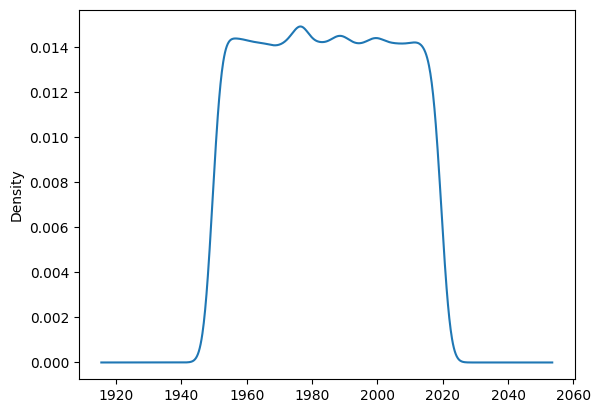

In [ ]:
data2['year_built'].plot(kind='kde')

Since neither column appear to be normally distributed, we can fill in the most frequent values instead:

*Note: We could have likely just dropped these 3 rows because there are nearly 50,000 observations*

In [ ]:
most_freq_stories = data.stories.mode()
data.stories = data.stories.fillna(float(most_freq_stories))
most_freq_year = data.year_built.mode()
data.year_built = data.year_built.fillna(float(most_freq_year))

Check that there are no longer NA entries:

In [ ]:
data.isna().sum()

locationid            0
portfolio             0
state                 0
county                0
postalcode            0
building_value        0
other_value           0
contents_value        0
time_element_value    0
occupancy_code        0
construction_code     0
stories               0
year_built            0
aal                   0
dtype: int64

Data cleaning is now complete!  We can move to create new columns that will help with our tasked questions.


**STEP 2: Find answers to 4 tasked questions**

**Task 1:  The first tasked question is to understand the *number of insured properties or "risks" in each state.*  We are also seeking to understand the *total insured value of all of the risks* in each state**

 We need to create a new column, "Total Insured Value" (TIV) that is the sum of Building Value, Other Value, Contents Value, and Time Element Value:

In [ ]:
data['total_insured_value'] = data['building_value'] + data['other_value'] + data['contents_value'] + data['time_element_value']
data.sample(5)

,locationid,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,total_insured_value
49176,49177,2,CO,Arapahoe,80160,6520003,68843,2073934,3144481,ATC-38,CN10,3,1975.0,34004.91168,11807261
42697,42698,2,TX,Denton,75077,754470,99311,437157,1136512,ATC-38,MS00,6,1997.0,14564.70000,2427450
7448,7449,1,MA,Franklin,1355,761646,89262,413430,230944,ATC-02,WD10,2,1971.0,8074.52280,1495282
41504,41505,2,NY,Steuben,14831,7080899,37962,2798092,1067153,ATC-38,CN10,6,1996.0,8897.12586,10984106
9609,9610,1,PA,Perry,17069,79663,0,414481,53585,ATC-01,MH00,1,2001.0,3943.64880,547729


We can create a new column "risk_count" that will be "1" for each locationID.  This will make it simple to count entries after we have grouped them by state.

In [ ]:
data['risk_count'] = 1
data.sample(5)

,locationid,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,total_insured_value,risk_count
23375,23376,1,TX,Bexar,78209,75865,0,282604,49903,ATC-01,MH00,1,1992.0,4900.46400,408372,1
46165,46166,2,NJ,Essex,7191,7404684,98257,562396,1048621,ATC-37,CN10,6,2000.0,16405.12440,9113958,1
10137,10138,1,PA,Centre,16875,93022,0,209247,78390,ATC-01,MH00,1,2001.0,2740.74480,380659,1
3670,3671,1,CO,Jefferson,80433,1472755,85562,1455777,1176887,ATC-01,MS00,6,2009.0,12070.02528,4190981,1
3763,3764,1,NY,Queens,11120,615869,98198,925847,727593,ATC-01,WD00,1,1978.0,12784.53780,2367507,1


Now we are prepared to calculate the total insured value and risk counts with the help of Numpy.  We can also sort the data descending by TIV:

In [ ]:
risk_by_state = data.groupby(['state']).agg({'risk_count':np.sum,'total_insured_value':np.sum})
risk_by_state.sort_values(ascending=False,by='total_insured_value')

,risk_count,total_insured_value
state,,
TX,9224,54388800398
NY,7583,44126045810
PA,7596,43766679186
IL,5517,30876727115
OH,4967,28810159860
MI,4025,23235091973
WI,3135,18152501444
NJ,2502,14495715370
MA,2399,13947784846


**RESULT 1:**

***The data shows that Texas has the largest amount of Total Insured Value and Risks, followed by New York, Pennsylvania, Illinois, Ohio, and so on.***

**Task 2:  The next insight we will seek to understand is the 5 counties containing the largest Total Insured Value (TIV) for Wood Frame properties.**

We can proceed by creating a filter for Wood Frame buildings only, so we know we are only looking at this subset of the data:

In [ ]:
WD10_filter = data.construction_code == 'WD10'
WD10_table = data.loc[WD10_filter,:]

Next we can group data entries by county *and state* in case there are any two states that contain counties with the same names.  To see the results, we'll show the table, sorted in descending order by TIV:

In [ ]:
WD10_TIV_by_county = WD10_table.groupby(['county','state']).agg({'total_insured_value':np.sum})
WD10_TIV_by_county = WD10_TIV_by_county['total_insured_value'].sort_values(ascending=False).head(5)
WD10_TIV_by_county

county    state
Cook      IL       234237580
Harris    TX       207748469
Dallas    TX       166821392
New York  NY       166712818
El Paso   TX       142863900
Name: total_insured_value, dtype: int64

In [ ]:
WD10_TIV_by_county.to_excel('WD10_TIV_by_county.xlsx',index=True)

**RESULT 2:**

**We find the counties with the highest total insured values for Wood Framed properties are Cook, IL; Harris, TX; Dallas, TX; New York, NY; and El Paso, TX.**

**Task 3: We are next tasked with finding the the top 10 postal codes that are 'most susceptible' to damage from winter storms in each portfolio.**

*Note:  For this task, we can assume that the most susceptible locations have accumulated the most Average Annual Losses (AAL) historically.*

Similar to the analysis we ran for Result 2, we can first create a filter to only show observations in Portfolio 1:

In [ ]:
portfolio1_filter = data.portfolio == 1
portfolio1_only = data.loc[portfolio1_filter,:]

Next we can group by postal code, aggregate the sum of AAL, and sort in descending order to see our results:

In [ ]:
aal_by_postal_code = portfolio1_only.groupby(['state','county','postalcode',]).agg({'aal':np.sum})
all_aalP1 = aal_by_postal_code['aal'].sort_values(ascending=False).head(10)
all_aalP1

state  county     postalcode
OH     Morgan     43787         123086.82520
IL     Whiteside  61230         122525.84443
TX     Bexar      78296         116088.34322
MI     Gogebic    49947         112737.34714
CO     El Paso    80916         107295.58867
MI     Wayne      48208         107260.01506
TX     Colorado   77460         107138.20824
OH     Trumbull   44404         105672.50500
MI     Midland    48670         104979.31853
CO     Jefferson  80021         103967.17212
Name: aal, dtype: float64

In [ ]:
all_aalP1.to_excel('aal_by_postal_codeP1.xlsx',index=True)

We can follow the same process for Portfolio 2:

In [ ]:
portfolio2_filter = data.portfolio == 2
portfolio2_only = data.loc[portfolio2_filter,:]
aal_by_postal_code2 = portfolio2_only.groupby(['postalcode','state','county']).agg({'aal':np.sum})
all_aalP2 = aal_by_postal_code2['aal'].sort_values(ascending=False).head(10)
all_aalP2

postalcode  state  county     
17078       PA     Lebanon        242458.821640
54025       WI     Saint Croix    231525.555680
54474       WI     Marathon       230069.711520
76244       TX     Tarrant        225268.610500
76654       TX     Mclennan       222514.142470
77067       TX     Harris         220991.359870
76198       TX     Tarrant        216351.071998
79359       TX     Gaines         216181.326380
61328       IL     Bureau         205703.672990
80825       CO     Cheyenne       201163.033870
Name: aal, dtype: float64

In [ ]:
all_aalP2.to_excel('aal_by_postal_codeP2.xlsx',index=True)

```
RESULT 3:

We find that in Portfolio 1, Postal Code 43787 contains the largest amount of Average Annual Loss at $123,087. This is approximately half of AAL in the most susceptible zip code in Portfolio 2, 17078 a historical average annual loss of $242,458.  We can see that even 10th place for highest AAL in Portfolio 2 is higher than every Postal Code in Portfolio 1.
```

**Task 4: For each Pennsylvania postal code, find the breakdown of total insured value (TIV), risk count, and average annual loss (AAL) by building height band.**

The first step for this task is to create our builing band heights, as described in the Assessment Instructions:

• Small: Buildings with 1 to 3 stories

• Medium: Buildings with 4 to 7 stories

• Large: Buildings with 8 or more stories


We need to convert the 'stories' data type to an integer for our conditional logic to operate:


In [ ]:
data['stories'] = data['stories'].astype(int)

In [ ]:
data['building_height_band'] = None
data['building_height_band'] = np.where((data.stories >=1) & (data.stories <= 3), 'Small', data.building_height_band)
data['building_height_band'] = np.where((data.stories >=4) & (data.stories <= 7), 'Medium', data.building_height_band)
data['building_height_band'] = np.where(data.stories >=8, 'Large', data.building_height_band)

As a Best Practice, we should investigate a sample of the dataset to ensure the bands were created correctly:

In [ ]:
data.sample(10)

,locationid,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,total_insured_value,risk_count,building_height_band
36209,36210,2,PA,Erie,16410,1160379,63780,749314,1195360,ATC-37,MS00,6,1954.0,11407.79880,3168833,1,Medium
26340,26341,2,TX,Deaf Smith,79025,1171909,56145,2787030,5139688,ATC-38,CN10,1,1951.0,26365.74336,9154772,1,Small
11251,11252,1,TX,Dickens,79370,603438,34824,644839,1501559,ATC-02,MS00,4,1971.0,20049.55200,2784660,1,Medium
24893,24894,2,TX,Dallas,75232,1776458,19871,3279087,7392222,ATC-38,CN00,5,1953.0,32316.11770,12467638,1,Medium
3824,3825,1,OH,Washington,45746,275708,81850,363468,335084,ATC-01,WD00,2,1992.0,6336.66000,1056110,1,Small
11564,11565,1,PA,Carbon,18254,1591790,79238,1890765,1159676,ATC-02,MS00,18,1978.0,28328.81400,4721469,1,Large
35529,35530,2,TX,Gaines,79360,489558,95936,1240578,1061804,ATC-38,MS00,2,2017.0,12198.38822,2887876,1,Small
15233,15234,1,TX,Lamb,79371,516286,72242,876207,768513,ATC-01,WD00,1,2014.0,15007.42656,2233248,1,Small
5684,5685,1,PA,Delaware,19086,772966,92322,217569,303871,ATC-02,WD00,2,2007.0,9984.44160,1386728,1,Small
7594,7595,1,WI,Rusk,54526,475484,54934,789212,186943,ATC-02,WD10,2,2006.0,11932.05816,1506573,1,Small


Next we can create a filter to isolate for only entries in Pennsylvania:

In [ ]:
PA_filter = data.state == "PA"
PA_table = data.loc[PA_filter,:]

Finally we can aggregate TIV, Risk Count, and AAL by Building Band Height and Postal Code:

In [ ]:
aggregatedPA = PA_table.groupby(['building_height_band','postalcode','county','year_built']).agg({'total_insured_value':np.sum,'risk_count':np.sum,'aal':np.sum})
aggregatedPA

total_insured_value  \
building_height_band postalcode county    year_built                        
Large                15001      Beaver    1989.0                  9556657   
                     15003      Beaver    1989.0                  3755922   
                     15007      Allegheny 1984.0                  6236544   
                     15010      Beaver    1978.0                  9994310   
                     15012      Fayette   1998.0                 15964468   
...                                                                   ...   
Small                19610      Berks     1979.0                  1833172   
                     19611      Berks     1971.0                  1571375   
                                          1983.0                 15605170   
                                          2010.0                   989637   
                     19612      Berks     1974.0                  2706636   

                                                      risk_count         aal  
building_height_band postalcode county    year_built                          
Large                15001      Beaver    1989.0               1  15290.6512  
                     15003      Beaver    1989.0               1  22535.5320  
                     15007      Allegheny 1984.0               1   9978.4704  
                     15010      Beaver    1978.0               1  10793.8548  
                     15012      Fayette   1998.0               1  14368.0212  
...                                                          ...         ...  
Small                19610      Berks     1979.0               1  10999.0320  
                     19611      Berks     1971.0               1  13199.5500  
                                          1983.0               2  19848.6540  
                                          2010.0               1   4750.2576  
                     19612      Berks     1974.0               1  29231.6688  

[7507 rows x 3 columns]

In [ ]:
aggregatedPA.to_excel('aggregatedPA.xlsx',index=True)

To go a step further, we can fid the TIV and Risk Counts by Building Height Bands:

In [ ]:
TIV_totals = aggregatedPA.groupby(['building_height_band']).agg({'total_insured_value':np.sum})
TIV_totals['total_insured_value'].sort_values(ascending=False)

building_height_band
Small     17491739090
Large     13551135252
Medium    12723804844
Name: total_insured_value, dtype: int64

In [ ]:
TIV_totals.to_excel('TIV_totals.xlsx',index=True)

In [ ]:
RC_totals = aggregatedPA.groupby(['building_height_band']).agg({'risk_count':np.sum})
RC_totals['risk_count'].sort_values(ascending=False)

building_height_band
Small     4726
Medium    1612
Large     1258
Name: risk_count, dtype: int64

In [ ]:
RC_totals.to_excel('RC_totals.xlsx',index=True)

In [ ]:
AAL_totals = aggregatedPA.groupby(['building_height_band']).agg({'aal':np.sum})
AAL_totals['aal'].sort_values(ascending=False)

building_height_band
Small     6.993177e+07
Medium    3.085791e+07
Large     2.581933e+07
Name: aal, dtype: float64

In [ ]:
AAL_totals.to_excel('AAL_totals.xlsx',index=True)

**RESULT 4:**

**The above shows us that in Pennslyvania, *Small Buildings* have the highest TIVs, Risk Counts, and AALs**

Now we can move on to our "bigger picture" questions of focus:

**Question 1:  Does one of the portfolios appear to be more vulnerable to damage from winter storm? If so, which one? Explain your reasoning and any analysis you conducted to support your conclusion.**

In [ ]:
vulnerability = data.groupby(['portfolio']).agg({'aal':np.sum})
vulnerability.sort_values(by='aal',ascending=False)

,aal
portfolio,
2,5.573475e+08
1,3.029414e+08


**Answer 1: We find that Portfolio 2 has a much higher total Average Annual Loss compared to Portfolio 1.  Thus we can say that Portfolio 2 is more vulnerable to damage from a winter storm.**


Where does this vulnerability stem from?  Perhaps we can find out if it is correlated with one of our other variables:

**Question 2:  Which factors appear to have the greatest influence on AAL? Explain your reasoning and any analysis you conducted to support your conclusion.**

Perhaps high AAL can be attributed to older age of the building.  


We can check if there is possibly a correlation between building age and AAL:

A positive correlation will tell us: for a higher variable x, we can expect a higher average annual loss:

A negative correlation will tell us: for a higher a variable x, we can expect a lower average annual loss:

In [ ]:
np.corrcoef(data.year_built,data.aal)

array([[ 1.        , -0.21544228],
       [-0.21544228,  1.        ]])

We can also check if a high AAL is correlated with building height:

In [ ]:
np.corrcoef(data.stories,data.aal)

array([[1.        , 0.20312421],
       [0.20312421, 1.        ]])

Neither of these correlations are strong enough to significanly affect AAL.

Perhaps the Construction Types is having a meaningful influence on Average Annual Loss.  We can group by this variable and observe AAL at each of the construction types to investigate:

In [ ]:
construction_code_analysis = data.groupby(['portfolio','construction_code']).agg({'aal':np.sum,'risk_count':np.sum})
construction_code_analysis.sort_values("aal",ascending=False)

aal  risk_count
portfolio construction_code                          
2         CN00               2.130763e+08        8418
          CN10               2.080407e+08        8225
          MS00               1.362306e+08        8141
1         WD00               1.098111e+08        8483
          WD10               1.063634e+08        8219
          MS00               7.060906e+07        4249
          MH10               8.242692e+06        1804
          MH00               7.915172e+06        1729

It appears that Wood and Wood Frame buildings are most prevalent in Portfolio 1 that have the risks with the highest AAL.

*However, it appears that Contcrete buildings in Portfolio 2 have an even higher AAL in Portfolio 2, so building type is likely not the reason for the higher vulnerability score in Portfolio 1.*

Another approach is to check total AAL Values for each of the Building Height Bankds, Building Age Bands, and Occupancy Types:

We can add a column for the building age band in order to investigate:

In [ ]:
data['building_age_band'] = None
data['building_age_band'] = np.where((data.year_built <= 1980), 'Old', data.building_age_band)
data['building_age_band'] = np.where((data.year_built >1981) & (data.year_built <= 2000), 'Average', data.building_age_band)
data['building_age_band'] = np.where(data.year_built > 2000, 'New', data.building_age_band)

We can group the data by portfolio and height band to see total AAL amounts for each subsection:

In [ ]:
building_height_analysis = data.groupby(['portfolio','building_height_band']).agg({'aal':np.sum})
building_height_analysis.sort_values(by=['portfolio','aal'],ascending=[True,False])

aal
portfolio building_height_band              
1         Small                 2.634013e+08
          Medium                2.952060e+07
          Large                 1.001954e+07
2         Small                 2.038465e+08
          Medium                1.818209e+08
          Large                 1.716801e+08

Similarly, we can group the data by portfolio and age band to see total AAL amounts for each subsection:

In [ ]:
building_age_analysis = data.groupby(['portfolio','building_age_band']).agg({'aal':np.sum})
building_age_analysis.sort_values(by= ['portfolio','aal'],ascending=[True,False])

aal
portfolio building_age_band              
1         Old                1.567436e+08
          Average            7.937932e+07
          New                6.234351e+07
2         Old                2.846389e+08
          Average            1.480373e+08
          New                1.170901e+08

Lastly, we can do the same for Occupancy Code Types:

In [ ]:
occupancy_code_analysis = data.groupby(['portfolio','occupancy_code']).agg({'aal':np.sum})
occupancy_code_analysis.sort_values(by= ['portfolio','aal'],ascending=[True,False])

aal
portfolio occupancy_code              
1         ATC-02          1.684771e+08
          ATC-01          1.344643e+08
2         ATC-37          2.790414e+08
          ATC-38          2.783061e+08

**Answer 2:  The results above provide a few findings -**

**First, it does not appear that building height band have much of an affect on large AAL in Portfolio 2, as there is more AAL in portfolio 1 when segmented in this fashion.**

**Second, it is a possibility that Older insured buildings are contributing to a relatively larger AAL in Portfolio 2.**

**Lastly, looking at AAL scores totals when segemented by Occupancy Codes, we see that it is possible that large AAL values for General Commercial (ATC-37) and General Industrial (ATC-38) could be influencing larger overall AAL values in Portfolio 2.**

***Therefore, as a recommendation, I would limit future policies on older buildings of these types moving forward***

Let's take a look at Pennslyvania's risk according to building age bands:

In [ ]:
aggregatedPA = aggregatedPA.reset_index()

In [ ]:
aggregatedPA['building_age_band'] = None
aggregatedPA['building_age_band'] = np.where((aggregatedPA.year_built <= 1980), 'Old', aggregatedPA.building_age_band)
aggregatedPA['building_age_band'] = np.where((aggregatedPA.year_built >=1981) & (aggregatedPA.year_built < 2000), 'Average', aggregatedPA.building_age_band)
aggregatedPA['building_age_band'] = np.where(aggregatedPA.year_built >= 2000, 'New', aggregatedPA.building_age_band)

In [ ]:
aggregatedPA

,building_height_band,postalcode,county,year_built,total_insured_value,risk_count,aal
0,Large,15001,Beaver,1989.0,9556657,1,15290.6512
1,Large,15003,Beaver,1989.0,3755922,1,22535.5320
2,Large,15007,Allegheny,1984.0,6236544,1,9978.4704
3,Large,15010,Beaver,1978.0,9994310,1,10793.8548
4,Large,15012,Fayette,1998.0,15964468,1,14368.0212
...,...,...,...,...,...,...,...
7502,Small,19610,Berks,1979.0,1833172,1,10999.0320
7503,Small,19611,Berks,1971.0,1571375,1,13199.5500
7504,Small,19611,Berks,1983.0,15605170,2,19848.6540
7505,Small,19611,Berks,2010.0,989637,1,4750.2576


In [ ]:
aggregatedPA.to_excel('aggregatedPAAGE.xlsx',index=True)